## Load Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, CondensedNearestNeighbour
from sklearn.preprocessing import RobustScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [57]:
originalFeatures = df.columns
print('Shape ', df.shape)
print('\nHave', len(originalFeatures), 'tables')
print(f'\n{originalFeatures}')
print(f'\n  Diabetes Dataset:\n{df.head()}')
print(f'\n  Missing values:\n{df.isnull().sum()}')
print(f'\n  Missing values percentage:\n{(df.isnull().sum()/len(df))*100}')

Shape  (768, 9)

Have 9 tables

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

  Diabetes Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   NaN   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0      NaN           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   NaN        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                       NaN  33.0        1  

  Missing values:
Pregnancies                  77
Glucose                     115


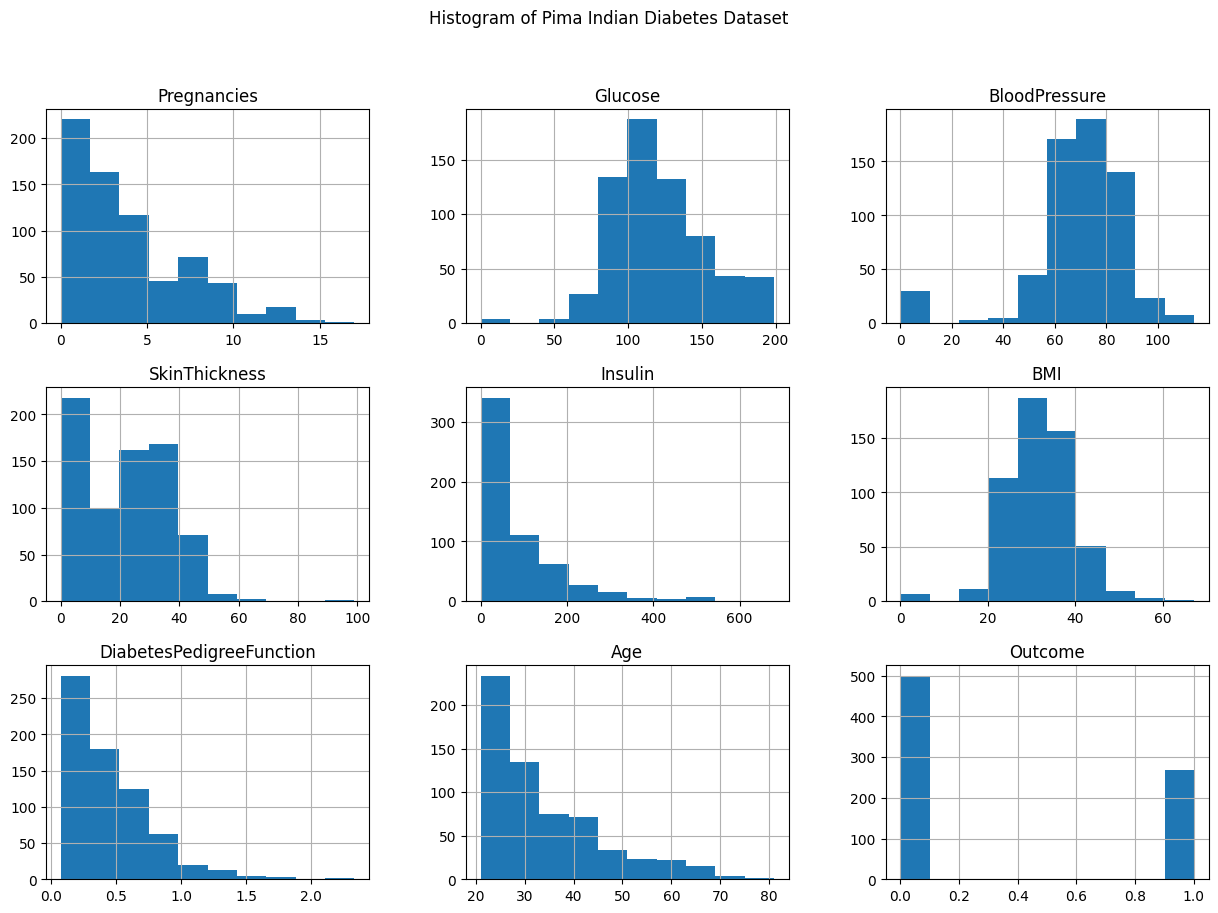

In [6]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(3,3))
    plt.suptitle("Histogram of Pima Indian Diabetes Dataset")
    plt.show()

plot_histograms(df)

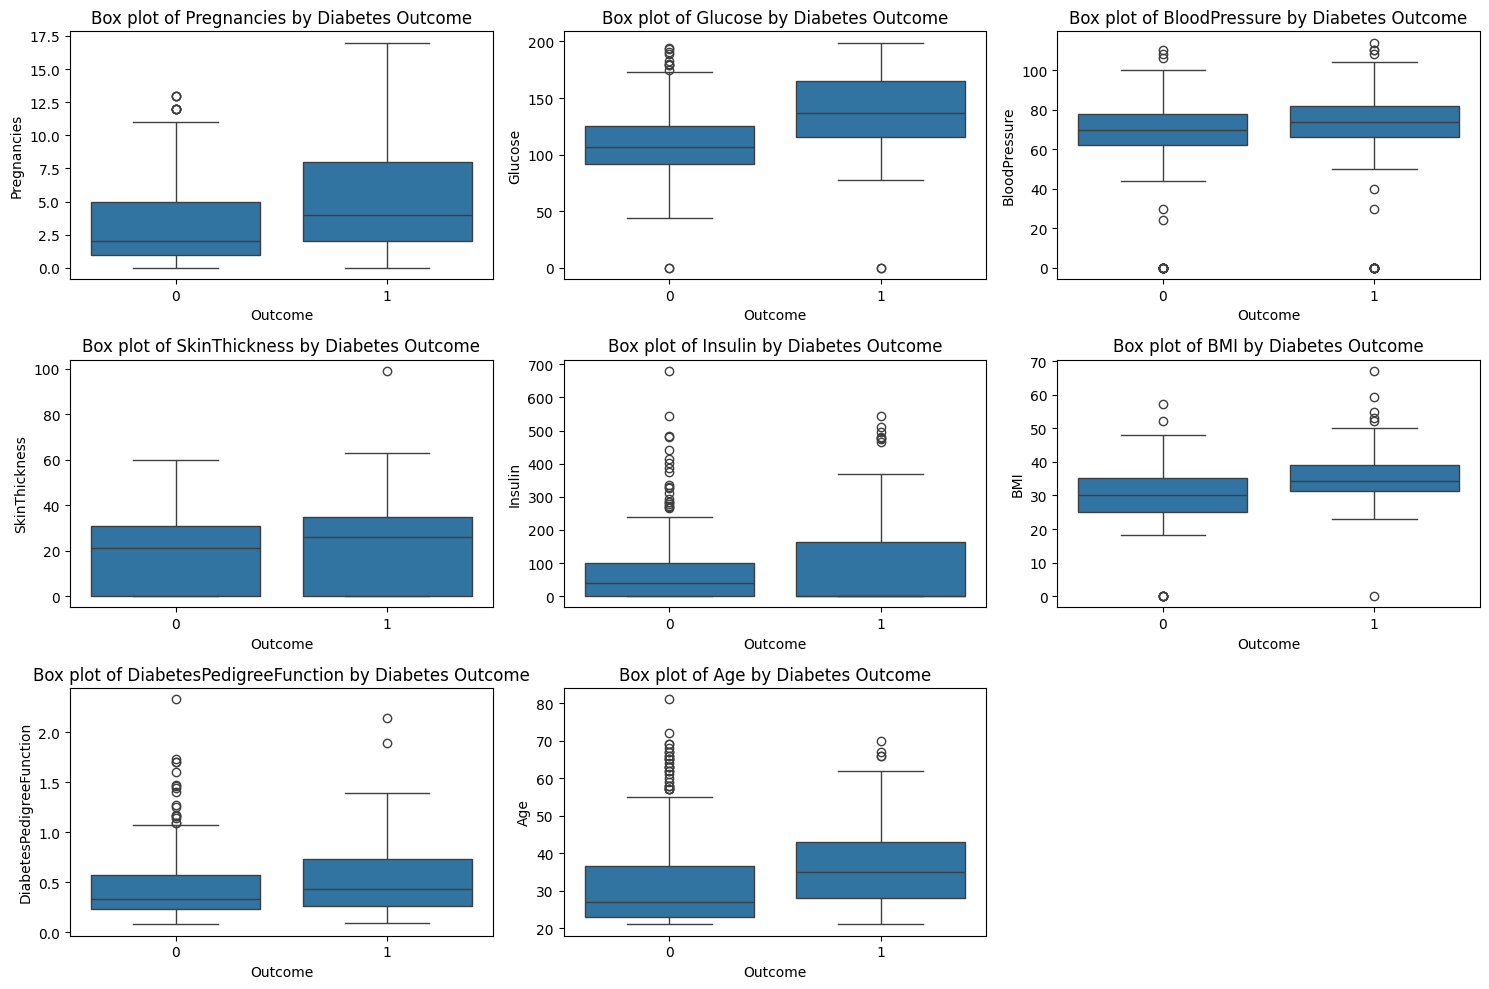

In [7]:
def plot_boxplot(data):
    plt.figure(figsize=(15,10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x='Outcome', y=column, data=data)
        plt.title(f"Box plot of {column} by Diabetes Outcome")
    plt.tight_layout()
    plt.show()

plot_boxplot(df)

## Imputasi missing value dengan mean

In [9]:
df_mean = df.copy()

df_mean = df_mean.fillna(df_mean.mean())

## Imputasi missing value dengan median

In [10]:
df_median = df.copy()

df_median = df_median.fillna(df_median.mean())

## Imputasi missing value dengan modus

In [11]:
df_modus = df.copy()

df_modus = df_modus.fillna(df_modus.mean())

## Cek korelasi antar variabel dengan heatmap

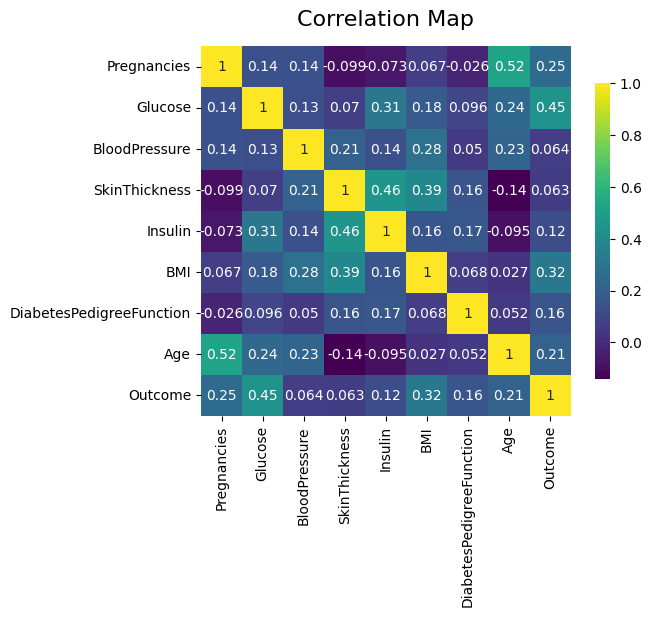

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Map", fontsize=16, pad=15)
plt.show()

## Lakukan imbalance handling dengan undersampling + mean Imputasi

In [13]:
x_mean=df_mean.drop('Outcome', axis=1)
y_mean=df_mean['Outcome']

random = RandomUnderSampler(sampling_strategy='not minority', random_state=42) #semua class kecuali minority
x_resampled_mean, y_resampled_mean = random.fit_resample(x_mean, y_mean)

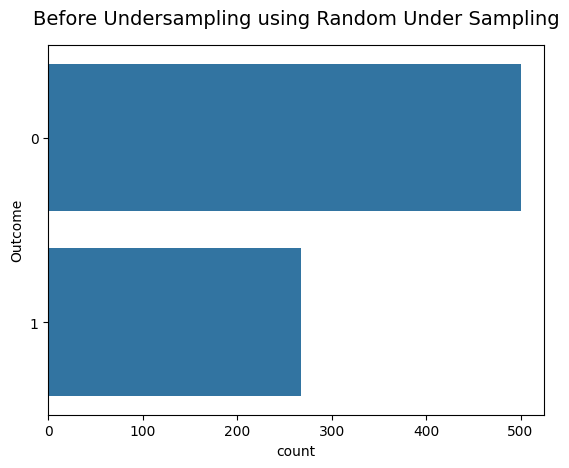

In [14]:
sns.countplot(data=df_mean, y=y_mean)
plt.title("Before Undersampling using Random Under Sampling", fontsize=14, pad=15)
plt.show()

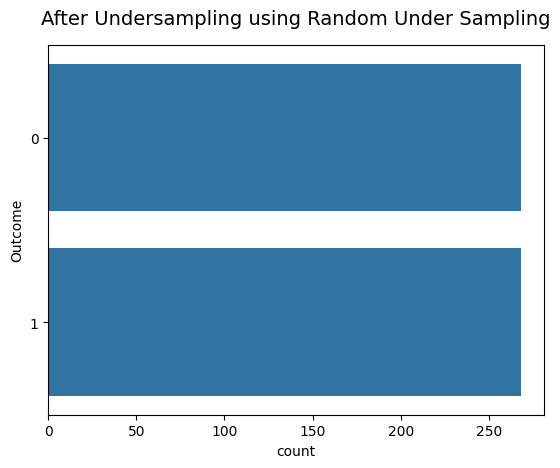

In [15]:
sns.countplot(data=x_resampled_mean, y=y_resampled_mean)
plt.title("After Undersampling using Random Under Sampling", fontsize=14, pad=15)
plt.show()

## Lakukan imbalance handling dengan undersampling + median imputasi

In [16]:
x_median=df_median.drop('Outcome', axis=1)
y_median=df_median['Outcome']

enn = EditedNearestNeighbours(sampling_strategy='majority') #cm yg majority class doang
x_resampled_median, y_resampled_median = enn.fit_resample(x_median, y_median)

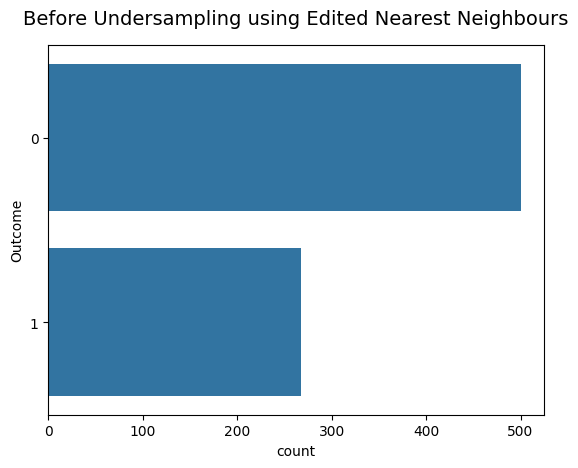

In [17]:
sns.countplot(data=df_median, y=y_median)
plt.title("Before Undersampling using Edited Nearest Neighbours", fontsize=14, pad=15)
plt.show()

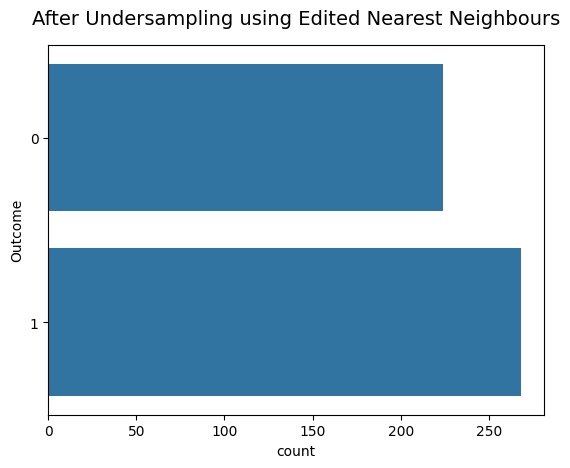

In [18]:
sns.countplot(data=x_resampled_median, y=y_resampled_median)
plt.title("After Undersampling using Edited Nearest Neighbours", fontsize=14, pad=15)
plt.show()

## Lakukan imbalance handling dengan undersampling + modus Imputasi

In [19]:
x_modus=df_modus.drop('Outcome', axis=1)
y_modus=df_modus['Outcome']

cnn = CondensedNearestNeighbour(sampling_strategy='auto') #mirip kek not minority
x_resampled_modus, y_resampled_modus = cnn.fit_resample(x_modus, y_modus)

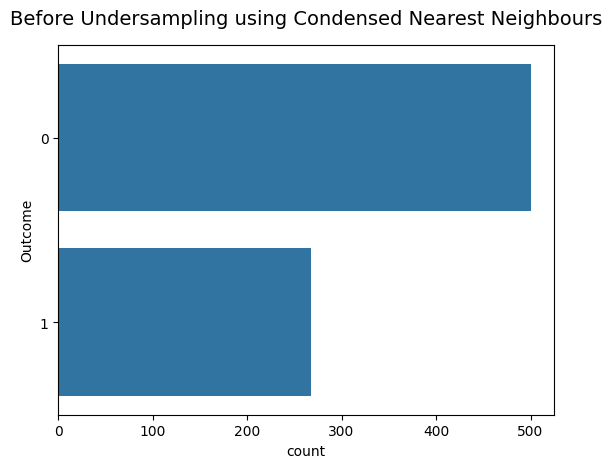

In [20]:
sns.countplot(data=df_modus, y=y_modus)
plt.title("Before Undersampling using Condensed Nearest Neighbours", fontsize=14, pad=15)
plt.show()

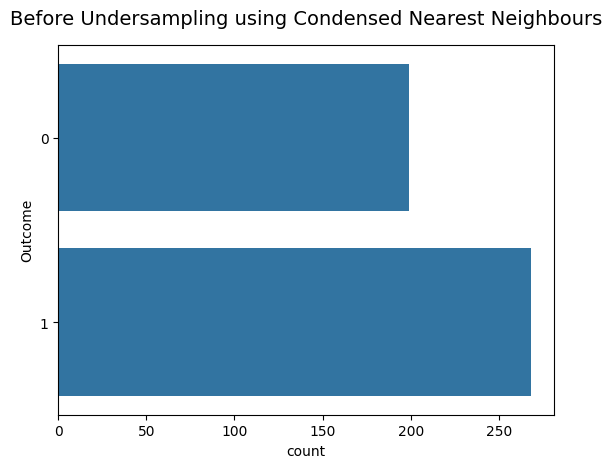

In [21]:
sns.countplot(data=x_resampled_modus, y=y_resampled_modus)
plt.title("Before Undersampling using Condensed Nearest Neighbours", fontsize=14, pad=15)
plt.show()

## Lakukan scaling dengan robust scaler dan minmax mean imputation

In [22]:
scaler = RobustScaler()
df_robust_mean = x_resampled_mean.copy()
df_robust_mean[df_robust_mean.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_mean[df_robust_mean.columns.difference(['Outcome'])])

In [27]:
print(df_robust_mean.head(3))

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
556    -0.560637 -0.710984       0.086726        0.56250  0.000000  0.000000   
117     0.239363  0.000000      -1.746607       -0.68750 -0.807123  0.416176   
572    -0.160637 -0.286742      -0.913274        0.28125 -0.345181 -0.608215   

     DiabetesPedigreeFunction       Age  
556                 -0.590302 -0.263844  
117                  0.635278 -0.680510  
572                  0.005622 -0.930510  


In [23]:
scaler = MinMaxScaler()
df_minmax_mean = x_resampled_mean.copy()
df_minmax_mean[df_minmax_mean.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_mean[df_minmax_mean.columns.difference(['Outcome'])])

In [28]:
print(df_minmax_mean.head(3))

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
556     0.058824  0.487437       0.614035       0.404040  0.141581  0.476806   
117     0.294118  0.605339       0.421053       0.000000  0.000000  0.502235   
572     0.176471  0.557789       0.508772       0.313131  0.081031  0.439642   

     DiabetesPedigreeFunction       Age  
556                  0.059688  0.176471  
117                  0.253898  0.078431  
572                  0.154120  0.019608  


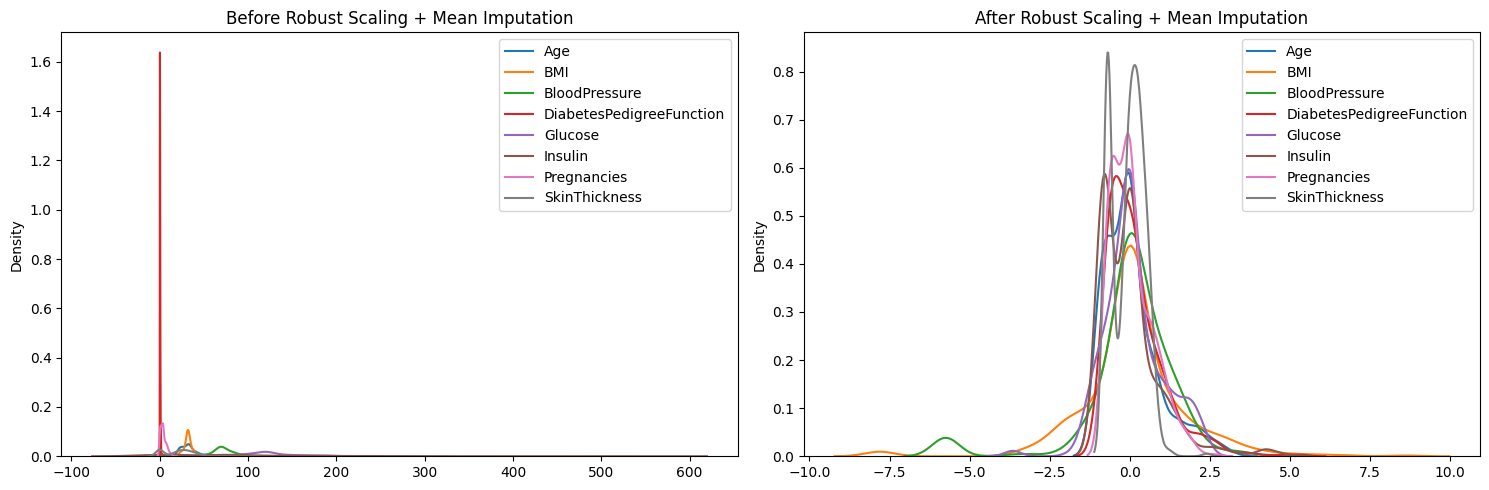

In [29]:
numeric_columns = df_robust_mean.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_mean[column], hist=False, label=column)
plt.title('Before Robust Scaling + Mean Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_mean[column], hist=False, label=column)
plt.title('After Robust Scaling + Mean Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

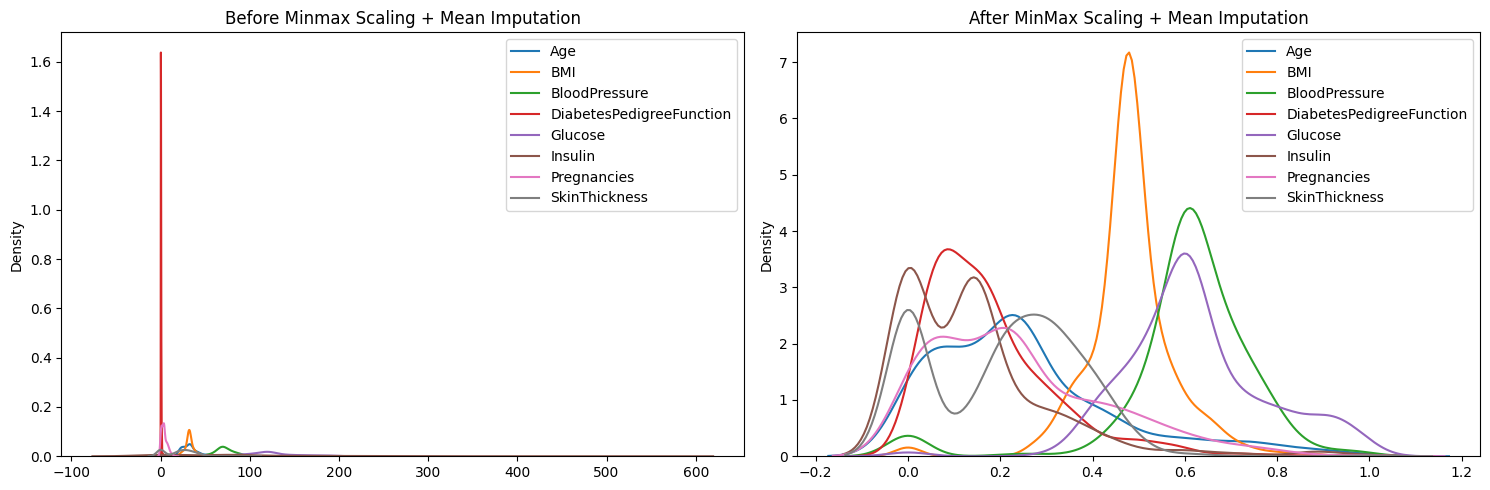

In [30]:
numeric_columns = df_minmax_mean.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_mean[column], hist=False, label=column)
plt.title('Before Minmax Scaling + Mean Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_mean[column], hist=False, label=column)
plt.title('After MinMax Scaling + Mean Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

## Lakukan scaling dengan robust scaler dan minmax median imputation

In [31]:
scaler = RobustScaler()
df_robust_median = x_resampled_median.copy()
df_robust_median[df_robust_median.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_median[df_robust_median.columns.difference(['Outcome'])])

In [32]:
print(df_robust_median.head(3))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         -0.4 -0.844630      -0.211377        0.03125  0.222709 -0.811183   
1          0.2  0.000000       1.645765       -0.68750 -1.000000  0.000000   
2         -0.4 -0.468791      -2.782806        0.50000  0.079626  0.000000   

   DiabetesPedigreeFunction       Age  
0                 -0.736531 -1.090909  
1                 -0.665683 -0.272727  
2                  0.144246  0.000000  


In [33]:
scaler = MinMaxScaler()
df_minmax_median = x_resampled_median.copy()
df_minmax_median[df_minmax_median.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_median[df_minmax_median.columns.difference(['Outcome'])])

In [34]:
print(df_minmax_median.head(3))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.447236       0.578947       0.232323  0.173112  0.418778   
1     0.235294  0.605339       0.807018       0.000000  0.000000  0.476806   
2     0.058824  0.517588       0.263158       0.383838  0.152855  0.476806   

   DiabetesPedigreeFunction       Age  
0                  0.039538  0.000000  
1                  0.050200  0.183673  
2                  0.172085  0.244898  


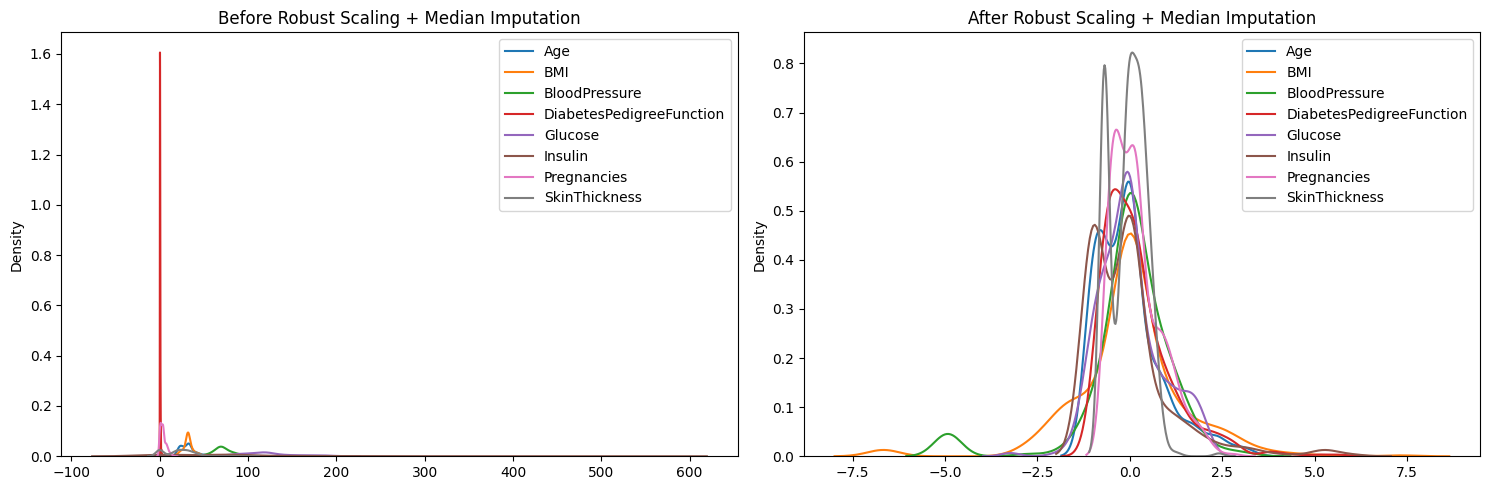

In [35]:
numeric_columns = df_robust_median.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_median[column], hist=False, label=column)
plt.title('Before Robust Scaling + Median Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_median[column], hist=False, label=column)
plt.title('After Robust Scaling + Median Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

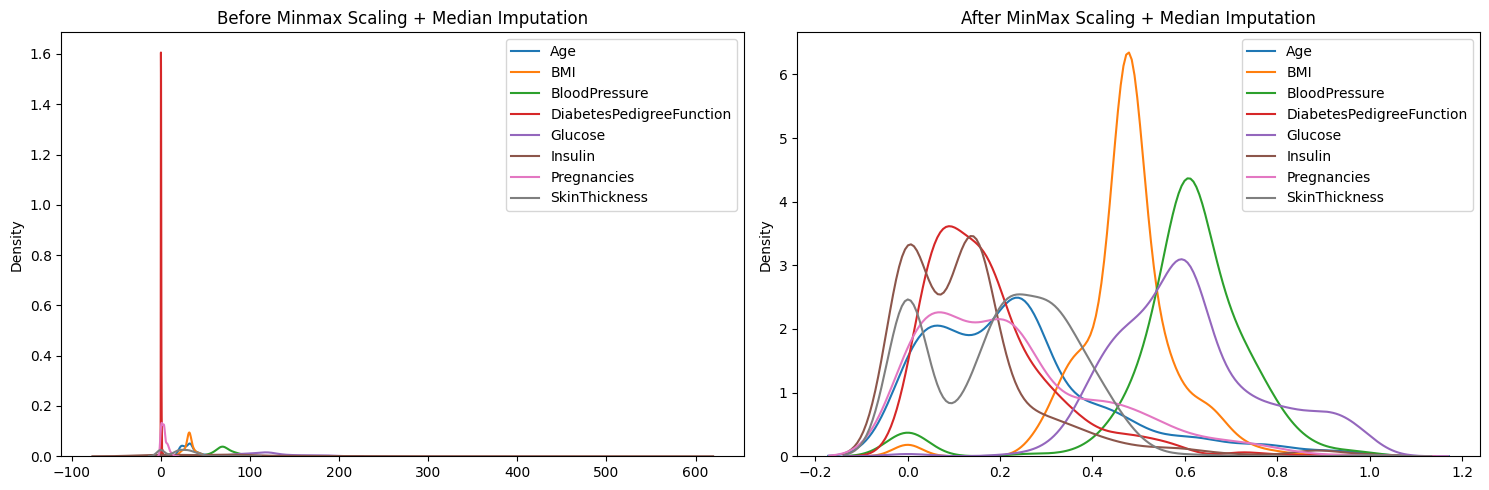

In [36]:
numeric_columns = df_minmax_median.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_median[column], hist=False, label=column)
plt.title('Before Minmax Scaling + Median Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_median[column], hist=False, label=column)
plt.title('After MinMax Scaling + Median Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

## Lakukan scaling dengan robust scaler dan minmax modus imputation

In [37]:
scaler = RobustScaler()
df_robust_modus = x_resampled_modus.copy()
df_robust_modus[df_robust_modus.columns.difference(['Outcome'])] = scaler.fit_transform(df_robust_modus[df_robust_modus.columns.difference(['Outcome'])])

In [38]:
print(df_robust_modus.head(3))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.000000 -0.441785       1.666667      -0.727273 -0.698895 -0.674276   
1    -0.560637 -1.013214      -0.333333       0.151515 -0.698895  0.000000   
2     0.239363 -0.127499       0.333333      -0.727273  0.000000 -1.801037   

   DiabetesPedigreeFunction       Age  
0                 -0.630208  0.987221  
1                 -0.229167 -0.166625  
2                 -0.619792 -0.243548  


In [39]:
scaler = MinMaxScaler()
df_minmax_modus = x_resampled_modus.copy()
df_minmax_modus[df_minmax_modus.columns.difference(['Outcome'])] = scaler.fit_transform(df_minmax_modus[df_minmax_modus.columns.difference(['Outcome'])])

In [40]:
print(df_minmax_modus.head(3))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.223717  0.527638       0.789474       0.000000  0.000000  0.441133   
1     0.058824  0.427136       0.578947       0.292929  0.000000  0.476806   
2     0.294118  0.582915       0.649123       0.000000  0.113057  0.381520   

   DiabetesPedigreeFunction       Age  
0                  0.054581  0.416667  
1                  0.129630  0.166667  
2                  0.056530  0.150000  


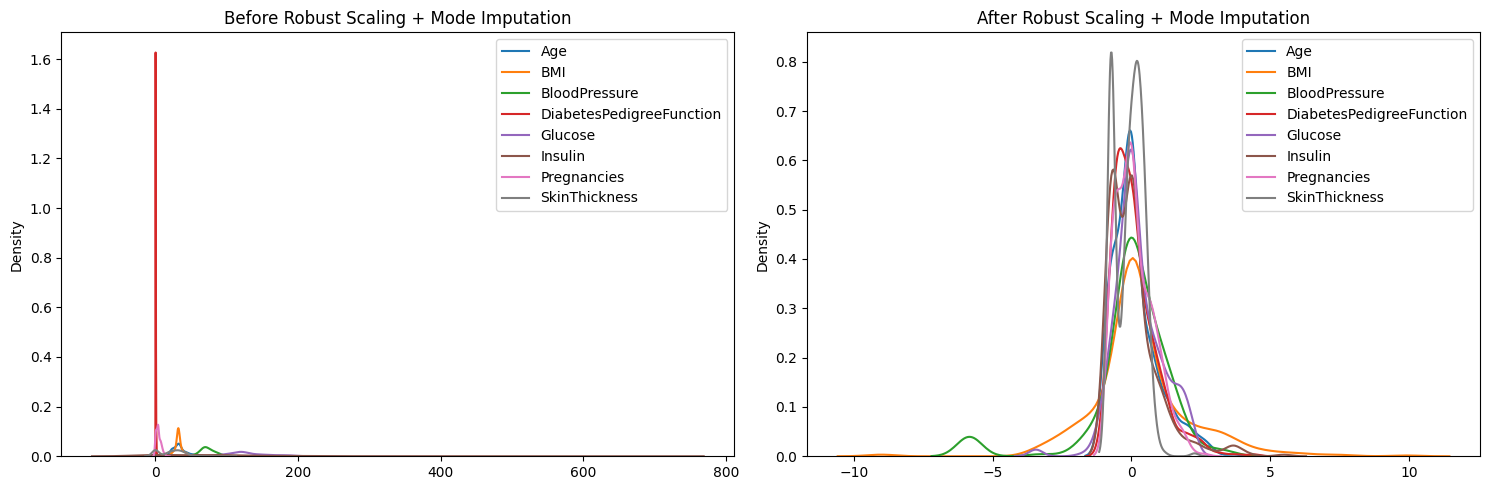

In [41]:
numeric_columns = df_robust_modus.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_modus[column], hist=False, label=column)
plt.title('Before Robust Scaling + Mode Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_robust_modus[column], hist=False, label=column)
plt.title('After Robust Scaling + Mode Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()

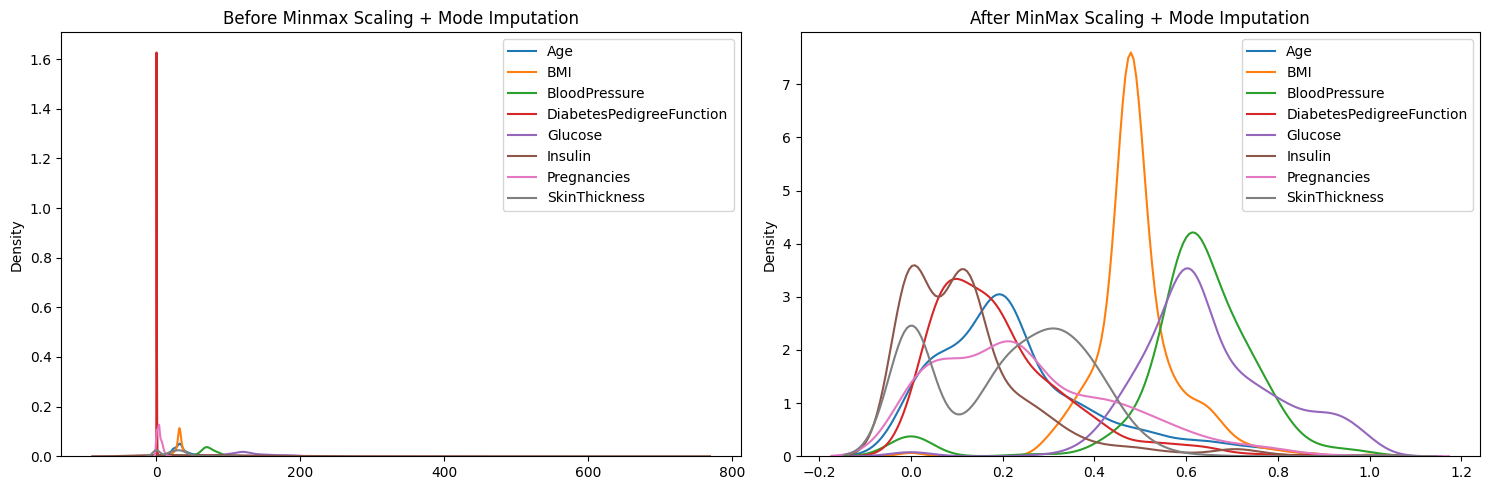

In [42]:
numeric_columns = df_minmax_modus.columns.difference(['Outcome'])
plt.figure(figsize=(15, 5))

#before
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(x_resampled_modus[column], hist=False, label=column)
plt.title('Before Minmax Scaling + Mode Imputation')
plt.xlabel('')
plt.legend()

#after
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(df_minmax_modus[column], hist=False, label=column)
plt.title('After MinMax Scaling + Mode Imputation')
plt.xlabel('')
plt.legend()

plt.tight_layout()
plt.show()